In [3]:
#importar librerias
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import rand
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
#leer el csv
data = pd.read_csv('IndianWeatherRepository.csv')
data

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79943,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1706203800,2024-01-25 23:00,11.0,51.8,...,376.2,478.8,6,10,07:12 AM,05:52 PM,05:28 PM,07:05 AM,Full Moon,99
79944,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1706203800,2024-01-25 23:00,7.3,45.1,...,67.5,74.1,4,9,06:03 AM,05:01 PM,04:37 PM,05:51 AM,Full Moon,99
79945,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1706203800,2024-01-25 23:00,21.0,69.7,...,20.7,31.2,2,2,06:39 AM,06:10 PM,05:56 PM,06:20 AM,Full Moon,99
79946,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1706203800,2024-01-25 23:00,28.0,82.4,...,26.6,37.3,2,3,06:42 AM,06:24 PM,06:12 PM,06:20 AM,Full Moon,99


In [5]:
#revisar la info del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79948 entries, 0 to 79947
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       79948 non-null  object 
 1   location_name                 79948 non-null  object 
 2   region                        79948 non-null  object 
 3   latitude                      79948 non-null  float64
 4   longitude                     79948 non-null  float64
 5   timezone                      79948 non-null  object 
 6   last_updated_epoch            79948 non-null  int64  
 7   last_updated                  79948 non-null  object 
 8   temperature_celsius           79948 non-null  float64
 9   temperature_fahrenheit        79948 non-null  float64
 10  condition_text                79948 non-null  object 
 11  wind_mph                      79948 non-null  float64
 12  wind_kph                      79948 non-null  float64
 13  w

In [6]:
#quitar las columnas que no necesitamos
data.drop(['country', 'location_name', 'region', 'timezone', 'last_updated_epoch', 'last_updated', 'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase'], axis=1, inplace=True)


In [7]:
#validar los datos
data

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,24.57,77.72,27.5,81.5,12.8,20.5,281,1008.0,29.77,0.0,...,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,93
1,23.33,77.80,27.5,81.5,9.6,15.5,287,1008.0,29.78,0.0,...,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,93
2,22.07,78.93,26.3,79.3,11.4,18.4,317,1009.0,29.78,0.0,...,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2,93
3,21.86,77.93,25.6,78.1,10.5,16.9,297,1009.0,29.80,0.0,...,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1,93
4,22.75,77.72,27.2,81.0,10.1,16.2,274,1009.0,29.79,0.0,...,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79943,28.88,77.53,11.0,51.8,3.8,6.1,50,1021.0,30.15,0.0,...,15.9,2109.5,20.7,35.6,13.0,376.2,478.8,6,10,99
79944,23.97,92.58,7.3,45.1,2.5,4.0,119,1021.0,30.14,0.0,...,8.3,507.4,12.5,9.1,3.3,67.5,74.1,4,9,99
79945,12.93,79.33,21.0,69.7,2.2,3.6,104,1017.0,30.03,0.0,...,10.8,567.4,40.1,15.4,4.5,20.7,31.2,2,2,99
79946,8.97,77.30,28.0,82.4,3.8,6.1,280,1015.0,29.97,0.0,...,13.6,460.6,55.8,8.3,2.9,26.6,37.3,2,3,99


In [8]:
#revisar la info del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79948 entries, 0 to 79947
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      79948 non-null  float64
 1   longitude                     79948 non-null  float64
 2   temperature_celsius           79948 non-null  float64
 3   temperature_fahrenheit        79948 non-null  float64
 4   wind_mph                      79948 non-null  float64
 5   wind_kph                      79948 non-null  float64
 6   wind_degree                   79948 non-null  int64  
 7   pressure_mb                   79948 non-null  float64
 8   pressure_in                   79948 non-null  float64
 9   precip_mm                     79948 non-null  float64
 10  precip_in                     79948 non-null  float64
 11  humidity                      79948 non-null  int64  
 12  cloud                         79948 non-null  int64  
 13  f

In [9]:
data.describe()

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,...,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000,79948.000000
mean,23.096835,80.241864,19.855093,67.739392,4.687755,7.549557,151.982851,1012.197116,29.889769,0.114107,...,14.374014,811.723589,34.458018,14.585711,5.675492,101.461179,117.975941,3.365262,6.848339,50.796993
std,5.793952,5.758322,6.032090,10.857440,2.634779,4.231833,114.134360,5.052699,0.149097,0.727277,...,7.291550,676.947728,26.040659,15.127328,11.672993,103.314118,116.027579,1.500929,3.602912,35.079360
min,7.170000,68.970000,-18.200000,-0.800000,2.200000,3.600000,1.000000,991.000000,29.280000,0.000000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.600000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,16.400000,61.600000,2.500000,4.000000,52.000000,1009.000000,29.790000,0.000000,...,9.100000,423.900000,14.100000,5.100000,1.400000,29.000000,36.800000,2.000000,3.000000,17.000000
50%,23.950000,78.690000,21.000000,69.800000,4.000000,6.500000,113.000000,1013.000000,29.920000,0.000000,...,13.300000,607.500000,29.700000,10.200000,2.900000,69.400000,84.400000,4.000000,9.000000,51.000000
75%,26.770000,83.900000,24.200000,75.500000,5.800000,9.400000,265.000000,1016.000000,29.990000,0.000000,...,18.600000,988.000000,50.275000,19.200000,5.800000,136.800000,158.100000,4.000000,10.000000,86.000000
max,34.570000,95.800000,38.300000,100.900000,26.800000,43.200000,360.000000,1042.000000,30.780000,43.800000,...,82.200000,13565.100000,234.600000,274.200000,541.700000,1374.800000,1537.800000,6.000000,10.000000,100.000000


<Axes: >

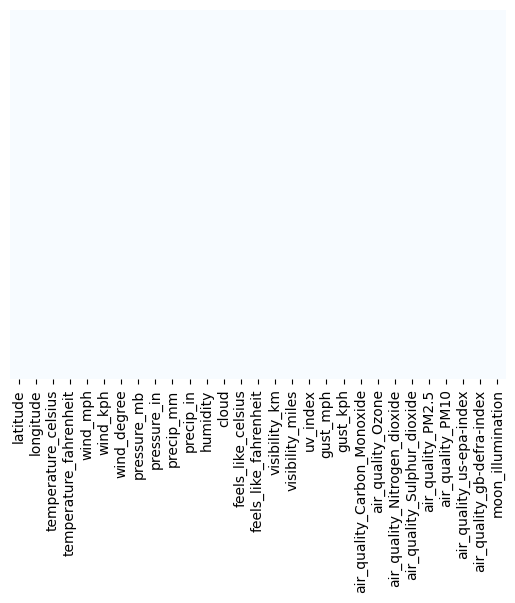

In [10]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [11]:
# Estandarizar la matriz X 
scaler = StandardScaler()
X_estandarizada = scaler.fit_transform(data)
X_estandarizada

array([[ 0.25426071, -0.43795397,  1.26738077, ..., -1.57587559,
        -1.34568066,  1.20307985],
       [ 0.04024309, -0.42406094,  1.26738077, ..., -1.57587559,
        -1.62323565,  1.20307985],
       [-0.17722643, -0.22782199,  1.06844349, ..., -0.90961734,
        -1.34568066,  1.20307985],
       ...,
       [-1.75474344, -0.15835688,  0.18980385, ..., -0.90961734,
        -1.34568066,  1.37412167],
       [-2.43821908, -0.51089234,  1.3502713 , ..., -0.90961734,
        -1.06812567,  1.37412167],
       [-0.20138971, -1.05793011,  0.3224287 , ..., -0.2433591 ,
        -0.51301569,  1.37412167]])

<Axes: >

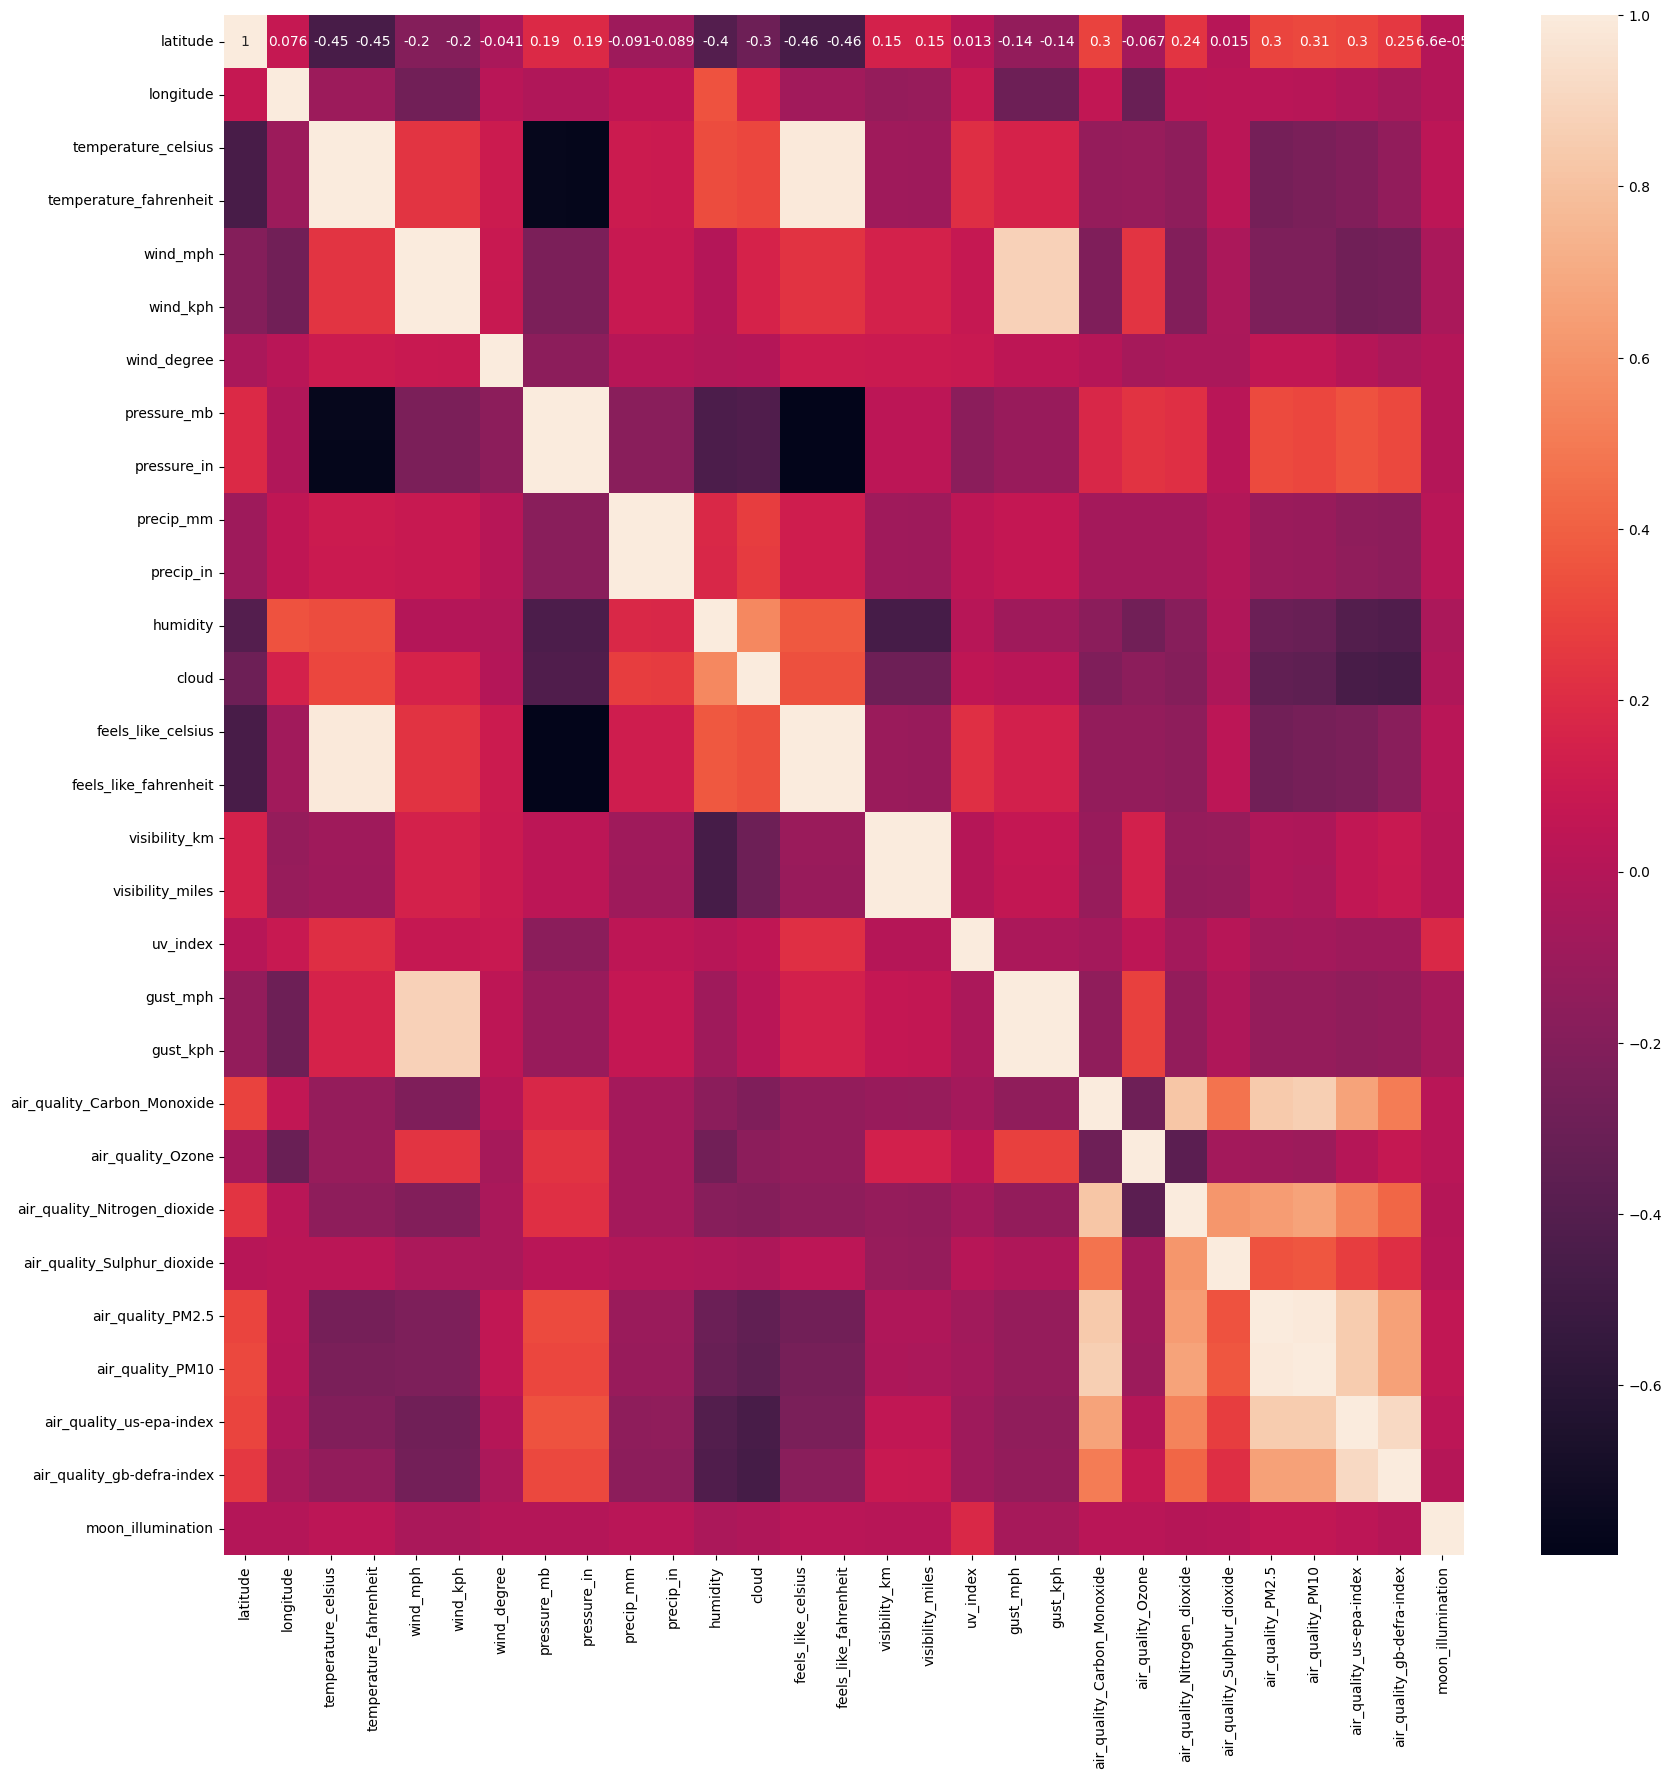

In [12]:
X_estandarizada_data = pd.DataFrame(X_estandarizada, columns=data.columns)

# Obtener la matriz de correlaciones
correlacion_matrix = X_estandarizada_data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacion_matrix, annot = True)

In [13]:
print(correlacion_matrix.head())

                        latitude  longitude  temperature_celsius  \
latitude                1.000000   0.076234            -0.453936   
longitude               0.076234   1.000000            -0.095798   
temperature_celsius    -0.453936  -0.095798             1.000000   
temperature_fahrenheit -0.453934  -0.095805             0.999989   
wind_mph               -0.200173  -0.273800             0.235570   

                        temperature_fahrenheit  wind_mph  wind_kph  \
latitude                             -0.453934 -0.200173 -0.200032   
longitude                            -0.095805 -0.273800 -0.273466   
temperature_celsius                   0.999989  0.235570  0.235390   
temperature_fahrenheit                1.000000  0.235576  0.235396   
wind_mph                              0.235576  1.000000  0.999912   

                        wind_degree  pressure_mb  pressure_in  precip_mm  ...  \
latitude                  -0.041458     0.188450     0.189287  -0.090639  ...   
longitud

In [25]:
#Convert dataset in X numpy matrix, and obtain de Y array (output).

data = np.array(data)

x = data[:,:-1]
y = data[:,-1]

print('X size: ', np.shape(x), 'Y size: ', np.shape(y))

X size:  (79948, 28) Y size:  (79948,)
